In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
# Replace '/content/movies_dataset.csv' with your actual file path
movie_data = pd.read_csv('/content/movies_dataset.csv', encoding='Latin-1')

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(movie_data.head())



First few rows of the dataset:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Anga

In [3]:
# Step 2: Preprocess the Data
# Drop rows with missing values in 'Rating', 'Genre', 'Director', 'Actor 1', and 'Actor 2' columns
movie_data.dropna(subset=['Rating', 'Genre', 'Director', 'Actor 1', 'Actor 2'], inplace=True)

# Extract features (Genre, Director, Actor 1, Actor 2) and target variable (Rating)
X = movie_data[['Genre', 'Director', 'Actor 1', 'Actor 2']]
y = movie_data['Rating']

# Display the shape of the dataset after preprocessing
print("\nShape of the dataset after preprocessing:")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")




Shape of the dataset after preprocessing:
Features (X): (7641, 4)
Target (y): (7641,)


In [4]:
# Step 3: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("\nShapes of the train and test sets:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")




Shapes of the train and test sets:
X_train: (6112, 4), y_train: (6112,)
X_test: (1529, 4), y_test: (1529,)


In [5]:
# Step 4: Choose a Regression Model and Build a Pipeline
# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Genre', 'Director', 'Actor 1', 'Actor 2'])
    ])

# Combine preprocessing steps with regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred_train = model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
print(f"\nTrain RMSE: {train_rmse}")

y_pred_test = model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"Test RMSE: {test_rmse}")




Train RMSE: 0.37451038269489706
Test RMSE: 2.0866979144050517


In [6]:
# Step 7: Predict Ratings for New Data
# Example new movie data
new_movie = pd.DataFrame({
    'Genre': ['Action'],
    'Director': ['Director X'],
    'Actor 1': ['Actor A'],
    'Actor 2': ['Actor B']
})

# Predict rating for the new movie
predicted_rating = model.predict(new_movie)
print(f'\nPredicted Rating for the new movie: {predicted_rating[0]}')




Predicted Rating for the new movie: 5.328774024712508


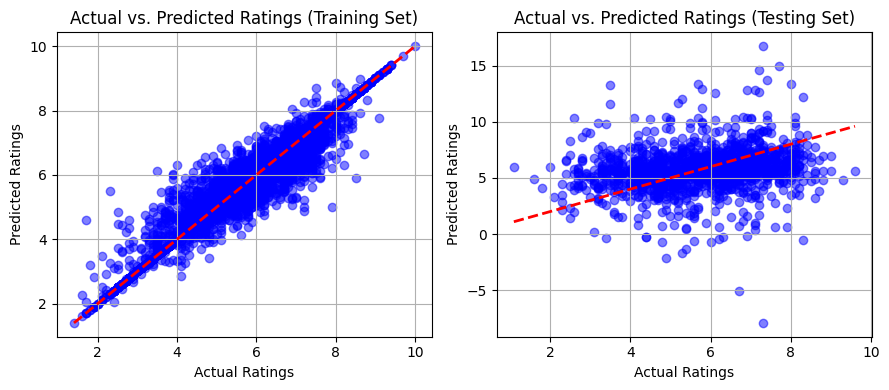

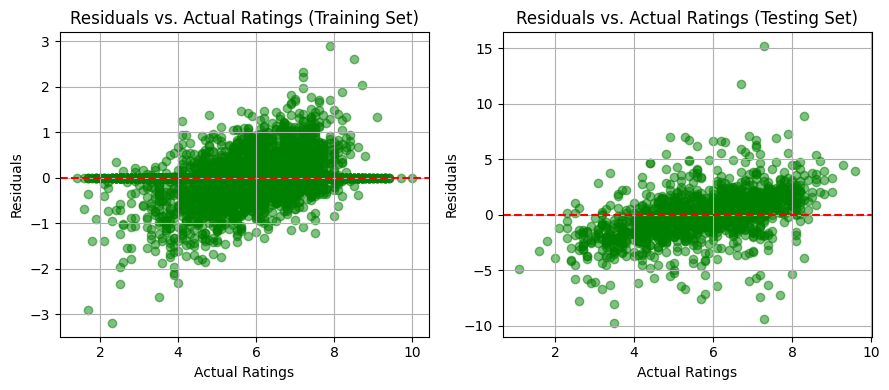

In [7]:
# Step 8: Visualize Actual vs. Predicted Ratings
# Calculate residuals (difference between actual and predicted ratings)
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# Plot actual vs. predicted ratings for training and testing sets
plt.figure(figsize=(9, 4))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Ratings (Training Set)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.grid(True)

# Testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Ratings (Testing Set)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot residuals
plt.figure(figsize=(9, 4))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, residuals_train, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Actual Ratings (Training Set)')
plt.xlabel('Actual Ratings')
plt.ylabel('Residuals')
plt.grid(True)

# Testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals_test, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Actual Ratings (Testing Set)')
plt.xlabel('Actual Ratings')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')